<a href="https://colab.research.google.com/github/nishitmv/ML/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

df = pd.read_csv('/content/sample_data/Regression_train.csv', sep='\s+', header=None)

# Apply StandardScaler to the entire DataFrame
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Split the scaled data into params and results
params = torch.tensor(scaled_df[:, 2:], dtype=torch.float32)
results = torch.tensor(scaled_df[:, :2], dtype=torch.float32)


print(params)
print(results)

tensor([[ 0.5701, -1.4113,  1.0917,  ...,  0.0165,  1.5525,  0.5519],
        [-0.4040, -1.4634, -0.4757,  ...,  1.4765,  0.2936,  0.8994],
        [ 0.1470,  1.5017, -1.0954,  ..., -1.1814,  1.2209,  0.1101],
        ...,
        [-0.8268,  1.6211,  0.7011,  ...,  1.6893,  0.6496, -0.2658],
        [-1.1213, -0.2022,  0.3703,  ...,  0.9823,  1.3501,  0.4684],
        [ 0.7842, -0.2211, -1.5608,  ..., -1.0071, -0.8613, -0.2596]])
tensor([[ 0.0652, -0.1789],
        [ 0.9187, -0.8082],
        [ 0.2922, -0.4780],
        ...,
        [-0.5871, -0.5915],
        [-1.4670,  0.8622],
        [ 0.9541, -0.6543]])


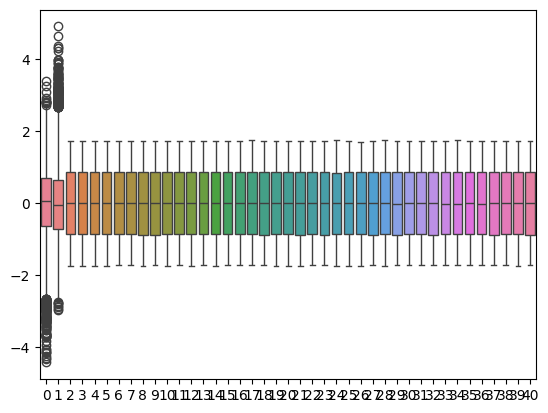

In [3]:
from sklearn.model_selection import train_test_split

sns.boxplot(scaled_df)
plt.show()


In [5]:

params_train, params_test, results_train, results_test = train_test_split(params, results, test_size=0.2, random_state=42)

print(params_train)
print(params_test)
print(results_train)
print(results_test)

tensor([[ 0.1572, -1.6503, -1.4043,  ...,  0.1910,  1.6394,  0.2476],
        [-0.1411, -0.9120, -1.5659,  ..., -0.7434, -1.1324,  0.6582],
        [-0.9366,  0.7618,  0.0042,  ...,  0.0397, -0.5898, -0.0344],
        ...,
        [ 0.5976, -0.7931,  1.6992,  ..., -0.7157, -0.0694,  1.6273],
        [ 1.1624,  0.9818,  1.3597,  ..., -1.5240, -0.7634, -0.7289],
        [-1.1557, -0.4064, -1.1657,  ...,  0.7303, -1.0822, -1.2211]])
tensor([[-1.7064, -0.7420,  1.5827,  ...,  1.6938, -0.0559,  0.2913],
        [-0.1386, -1.7198, -0.9871,  ...,  0.3991,  1.0225,  1.2318],
        [ 1.0437,  0.4167,  0.9624,  ..., -1.3814, -1.5118,  1.1939],
        ...,
        [ 0.9277,  0.1963,  1.4351,  ...,  1.2812,  1.2803,  1.6376],
        [-1.0533,  1.1212,  0.3665,  ..., -0.5490, -0.3689, -1.3992],
        [ 0.5021, -1.6736,  1.4687,  ...,  0.9840, -0.1279,  0.0124]])
tensor([[-0.0365,  0.8036],
        [-0.9130,  0.8686],
        [ 1.3777, -1.1678],
        ...,
        [-0.3146,  0.1970],
       

 MSE

torch.Size([19200, 39])
Epoch 1/50, Train Loss: 1.0004, Test Loss: 0.9929
Epoch 2/50, Train Loss: 0.9866, Test Loss: 0.9797
Epoch 3/50, Train Loss: 0.9733, Test Loss: 0.9667
Epoch 4/50, Train Loss: 0.9601, Test Loss: 0.9535
Epoch 5/50, Train Loss: 0.9468, Test Loss: 0.9399
Epoch 6/50, Train Loss: 0.9332, Test Loss: 0.9259
Epoch 7/50, Train Loss: 0.9191, Test Loss: 0.9111
Epoch 8/50, Train Loss: 0.9043, Test Loss: 0.8956
Epoch 9/50, Train Loss: 0.8888, Test Loss: 0.8791
Epoch 10/50, Train Loss: 0.8723, Test Loss: 0.8615
Epoch 11/50, Train Loss: 0.8547, Test Loss: 0.8429
Epoch 12/50, Train Loss: 0.8361, Test Loss: 0.8231
Epoch 13/50, Train Loss: 0.8163, Test Loss: 0.8021
Epoch 14/50, Train Loss: 0.7952, Test Loss: 0.7797
Epoch 15/50, Train Loss: 0.7729, Test Loss: 0.7561
Epoch 16/50, Train Loss: 0.7493, Test Loss: 0.7313
Epoch 17/50, Train Loss: 0.7245, Test Loss: 0.7052
Epoch 18/50, Train Loss: 0.6984, Test Loss: 0.6779
Epoch 19/50, Train Loss: 0.6711, Test Loss: 0.6495
Epoch 20/50, Tra

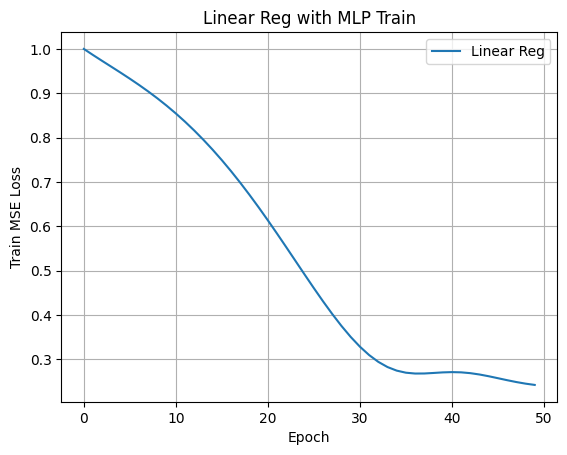

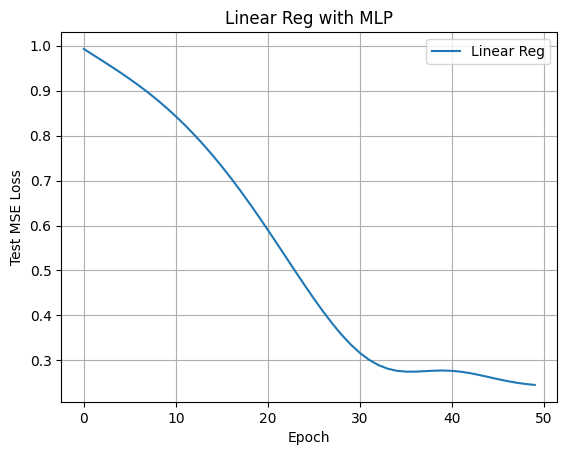

In [14]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score

print(params_train.shape)

model = nn.Sequential(
            nn.Linear(params_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )


mseLoss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_mse_losses = []
test_r2_scores = []
results_pred = []
epochs = 50
for epoch in range(epochs):
 model.train()
 optimizer.zero_grad()
 outputs = model(params_train)
 loss = mseLoss(outputs, results_train)
 loss.backward()
 optimizer.step()

 model.eval()
 with torch.no_grad():
     test_pred = model(params_test)
     test_mse_loss = mseLoss(test_pred, results_test)
     results_pred.append(test_pred)

 train_losses.append(loss.item())
 test_mse_losses.append(test_mse_loss.item())

 print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_mse_loss.item():.4f}')

torch.save(model, 'Adam3Layers.pth')

plt.plot(train_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Train MSE Loss")
plt.title("Linear Reg with MLP Train")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(test_mse_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Test MSE Loss")
plt.title("Linear Reg with MLP")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
from sklearn.metrics import r2_score

final_test_pred = results_pred[-1].numpy()
results_test_nump = results_test.numpy()


test_r2_scores = r2_score(results_test_nump, final_test_pred)
print(test_r2_scores)
r2_each = r2_score(results_test_nump, final_test_pred, multioutput='raw_values')
print("Average R2 across outputs:", test_r2_scores)
print("Individual R2 scores:", r2_each)

0.7580127120018005
Average R2 across outputs: 0.7580127120018005
Individual R2 scores: [0.9538865 0.5621389]


MSE and MAE

torch.Size([19200, 39])
Epoch 1/50, Train Loss: 1.0337, Test MSE Loss: 1.0325
Epoch 1/50, Train Loss: 1.0337, Test MAE Loss: 0.8050
Epoch 2/50, Train Loss: 1.0252, Test MSE Loss: 1.0250
Epoch 2/50, Train Loss: 1.0252, Test MAE Loss: 0.8024
Epoch 3/50, Train Loss: 1.0179, Test MSE Loss: 1.0185
Epoch 3/50, Train Loss: 1.0179, Test MAE Loss: 0.8001
Epoch 4/50, Train Loss: 1.0114, Test MSE Loss: 1.0126
Epoch 4/50, Train Loss: 1.0114, Test MAE Loss: 0.7981
Epoch 5/50, Train Loss: 1.0055, Test MSE Loss: 1.0070
Epoch 5/50, Train Loss: 1.0055, Test MAE Loss: 0.7961
Epoch 6/50, Train Loss: 1.0000, Test MSE Loss: 1.0016
Epoch 6/50, Train Loss: 1.0000, Test MAE Loss: 0.7942
Epoch 7/50, Train Loss: 0.9946, Test MSE Loss: 0.9961
Epoch 7/50, Train Loss: 0.9946, Test MAE Loss: 0.7922
Epoch 8/50, Train Loss: 0.9891, Test MSE Loss: 0.9904
Epoch 8/50, Train Loss: 0.9891, Test MAE Loss: 0.7902
Epoch 9/50, Train Loss: 0.9835, Test MSE Loss: 0.9844
Epoch 9/50, Train Loss: 0.9835, Test MAE Loss: 0.7880
Epoc

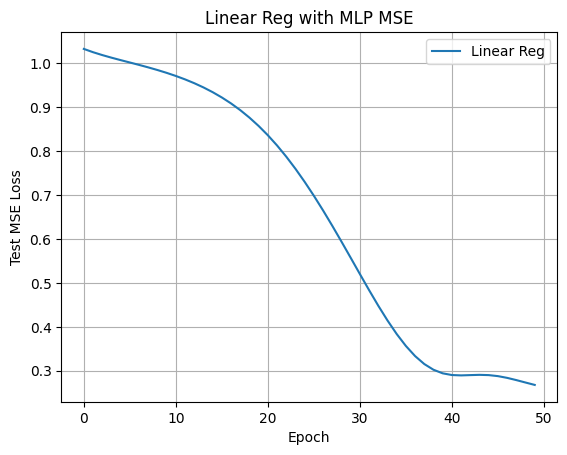

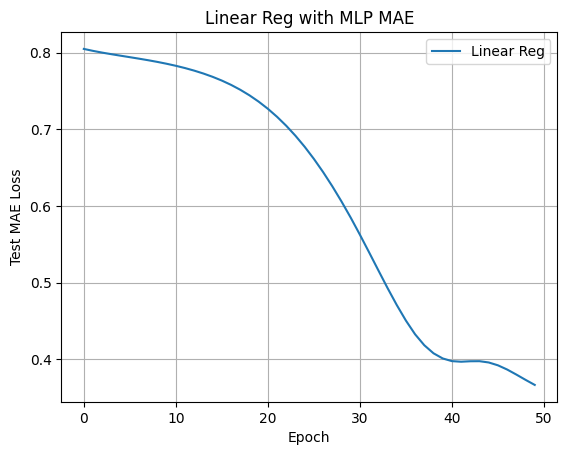

0.7358949780464172
Average R2 across outputs: 0.7358949780464172
Individual R2 scores: [0.9344058  0.53738415]


In [18]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score

print(params_train.shape)

model = nn.Sequential(
            nn.Linear(params_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 64),
             nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )


mseLoss = nn.MSELoss()
maeLoss = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_mse_losses = []
test_mae_losses = []
test_r2_scores = []
results_pred = []
epochs = 50
for epoch in range(epochs):
 model.train()
 optimizer.zero_grad()
 outputs = model(params_train)
 loss = mseLoss(outputs, results_train)
 loss.backward()
 optimizer.step()

 model.eval()
 with torch.no_grad():
     test_pred = model(params_test)
     test_mse_loss = mseLoss(test_pred, results_test)
     test_mae_loss = maeLoss(test_pred, results_test)
     results_pred.append(test_pred)

 train_losses.append(loss.item())
 test_mse_losses.append(test_mse_loss.item())
 test_mae_losses.append(test_mae_loss.item())
 print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test MSE Loss: {test_mse_loss.item():.4f}')
 print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test MAE Loss: {test_mae_loss.item():.4f}')




plt.plot(test_mse_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Test MSE Loss")
plt.title("Linear Reg with MLP MSE")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(test_mae_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Test MAE Loss")
plt.title("Linear Reg with MLP MAE")
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import r2_score

final_test_pred = results_pred[-1].numpy()
results_test_nump = results_test.numpy()


test_r2_scores = r2_score(results_test_nump, final_test_pred)
print(test_r2_scores)
r2_each = r2_score(results_test_nump, final_test_pred, multioutput='raw_values')
print("Average R2 across outputs:", test_r2_scores)
print("Individual R2 scores:", r2_each)

More Layers

torch.Size([19200, 39])
Epoch 1/50, Train Loss: 1.0240, Test Loss: 1.0273
Epoch 2/50, Train Loss: 1.0190, Test Loss: 1.0226
Epoch 3/50, Train Loss: 1.0144, Test Loss: 1.0183
Epoch 4/50, Train Loss: 1.0101, Test Loss: 1.0140
Epoch 5/50, Train Loss: 1.0059, Test Loss: 1.0099
Epoch 6/50, Train Loss: 1.0017, Test Loss: 1.0058
Epoch 7/50, Train Loss: 0.9977, Test Loss: 1.0017
Epoch 8/50, Train Loss: 0.9936, Test Loss: 0.9974
Epoch 9/50, Train Loss: 0.9895, Test Loss: 0.9928
Epoch 10/50, Train Loss: 0.9848, Test Loss: 0.9874
Epoch 11/50, Train Loss: 0.9795, Test Loss: 0.9812
Epoch 12/50, Train Loss: 0.9734, Test Loss: 0.9741
Epoch 13/50, Train Loss: 0.9662, Test Loss: 0.9658
Epoch 14/50, Train Loss: 0.9580, Test Loss: 0.9565
Epoch 15/50, Train Loss: 0.9486, Test Loss: 0.9460
Epoch 16/50, Train Loss: 0.9382, Test Loss: 0.9342
Epoch 17/50, Train Loss: 0.9266, Test Loss: 0.9212
Epoch 18/50, Train Loss: 0.9137, Test Loss: 0.9068
Epoch 19/50, Train Loss: 0.8994, Test Loss: 0.8908
Epoch 20/50, Tra

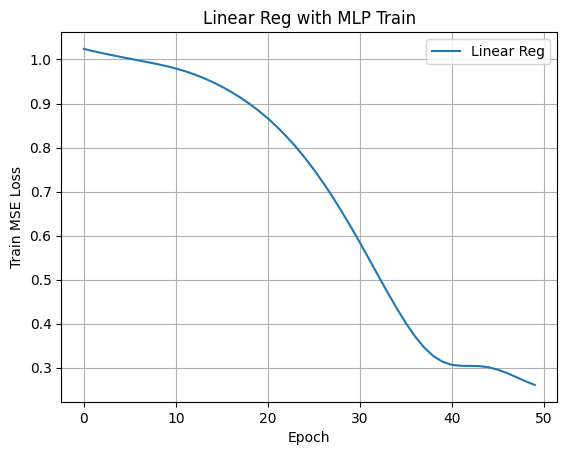

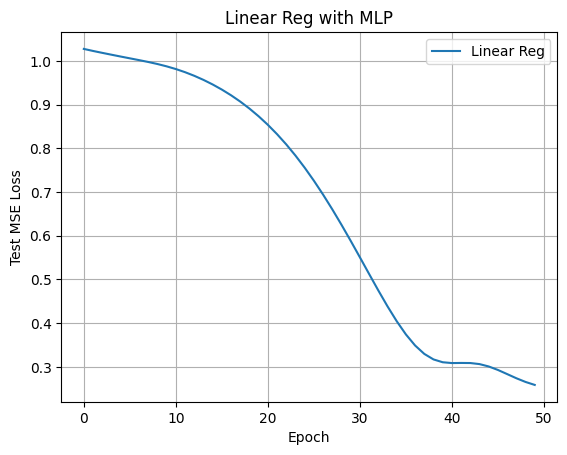

0.7450058460235596
Average R2 across outputs: 0.7450058460235596
Individual R2 scores: [0.948156  0.5418557]


In [20]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score

print(params_train.shape)

model = nn.Sequential(
            nn.Linear(params_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 64),
             nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 2)
        )


mseLoss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_mse_losses = []
test_r2_scores = []
results_pred = []
epochs = 50
for epoch in range(epochs):
 model.train()
 optimizer.zero_grad()
 outputs = model(params_train)
 loss = mseLoss(outputs, results_train)
 loss.backward()
 optimizer.step()

 model.eval()
 with torch.no_grad():
     test_pred = model(params_test)
     test_mse_loss = mseLoss(test_pred, results_test)
     results_pred.append(test_pred)

 train_losses.append(loss.item())
 test_mse_losses.append(test_mse_loss.item())

 print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_mse_loss.item():.4f}')

torch.save(model, 'Adam5Layers.pth')

plt.plot(train_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Train MSE Loss")
plt.title("Linear Reg with MLP Train")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(test_mse_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Test MSE Loss")
plt.title("Linear Reg with MLP")
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import r2_score

final_test_pred = results_pred[-1].numpy()
results_test_nump = results_test.numpy()


test_r2_scores = r2_score(results_test_nump, final_test_pred)
print(test_r2_scores)
r2_each = r2_score(results_test_nump, final_test_pred, multioutput='raw_values')
print("Average R2 across outputs:", test_r2_scores)
print("Individual R2 scores:", r2_each)

TanH + Adam

torch.Size([19200, 39])
Epoch 1/50, Train Loss: 1.0135, Test Loss: 0.9935
Epoch 2/50, Train Loss: 0.9849, Test Loss: 0.9659
Epoch 3/50, Train Loss: 0.9572, Test Loss: 0.9386
Epoch 4/50, Train Loss: 0.9296, Test Loss: 0.9110
Epoch 5/50, Train Loss: 0.9019, Test Loss: 0.8827
Epoch 6/50, Train Loss: 0.8735, Test Loss: 0.8535
Epoch 7/50, Train Loss: 0.8441, Test Loss: 0.8228
Epoch 8/50, Train Loss: 0.8133, Test Loss: 0.7906
Epoch 9/50, Train Loss: 0.7810, Test Loss: 0.7566
Epoch 10/50, Train Loss: 0.7469, Test Loss: 0.7208
Epoch 11/50, Train Loss: 0.7110, Test Loss: 0.6832
Epoch 12/50, Train Loss: 0.6734, Test Loss: 0.6440
Epoch 13/50, Train Loss: 0.6342, Test Loss: 0.6036
Epoch 14/50, Train Loss: 0.5938, Test Loss: 0.5625
Epoch 15/50, Train Loss: 0.5528, Test Loss: 0.5214
Epoch 16/50, Train Loss: 0.5118, Test Loss: 0.4812
Epoch 17/50, Train Loss: 0.4718, Test Loss: 0.4430
Epoch 18/50, Train Loss: 0.4336, Test Loss: 0.4077
Epoch 19/50, Train Loss: 0.3985, Test Loss: 0.3764
Epoch 20/50, Tra

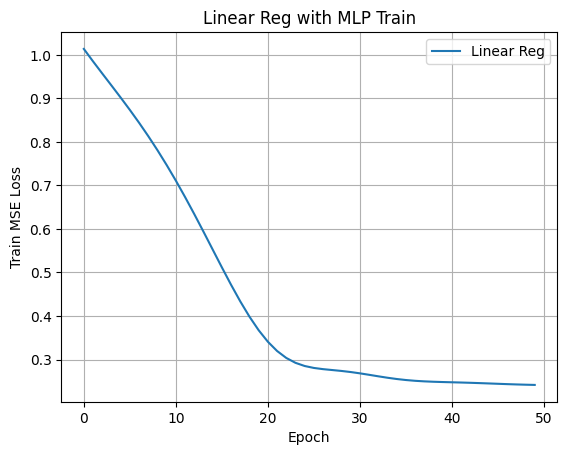

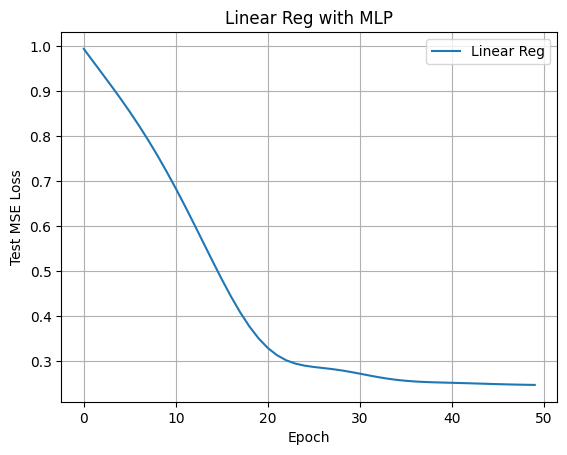

0.7568703293800354
Average R2 across outputs: 0.7568703293800354
Individual R2 scores: [0.9632906 0.5504501]


In [29]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score

print(params_train.shape)

model = nn.Sequential(
            nn.Linear(params_train.shape[1], 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 32),
            nn.Tanh(),
            nn.Linear(32, 2)
        )


mseLoss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_mse_losses = []
test_r2_scores = []
results_pred = []
epochs = 50
for epoch in range(epochs):
 model.train()
 optimizer.zero_grad()
 outputs = model(params_train)
 loss = mseLoss(outputs, results_train)
 loss.backward()
 optimizer.step()

 model.eval()
 with torch.no_grad():
     test_pred = model(params_test)
     test_mse_loss = mseLoss(test_pred, results_test)
     results_pred.append(test_pred)

 train_losses.append(loss.item())
 test_mse_losses.append(test_mse_loss.item())

 print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_mse_loss.item():.4f}')

torch.save(model, 'Tanh4Layers.pth')

plt.plot(train_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Train MSE Loss")
plt.title("Linear Reg with MLP Train")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(test_mse_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Test MSE Loss")
plt.title("Linear Reg with MLP")
plt.legend()
plt.grid(True)
plt.show()


from sklearn.metrics import r2_score

final_test_pred = results_pred[-1].numpy()
results_test_nump = results_test.numpy()
test_r2_scores = r2_score(results_test_nump, final_test_pred)
print(test_r2_scores)
r2_each = r2_score(results_test_nump, final_test_pred, multioutput='raw_values')
print("Average R2 across outputs:", test_r2_scores)
print("Individual R2 scores:", r2_each)

In [ ]:
ADAM + Sigmoid

torch.Size([19200, 39])
Epoch 1/100, Train Loss: 1.0028, Test Loss: 1.0064
Epoch 2/100, Train Loss: 0.9995, Test Loss: 1.0057
Epoch 3/100, Train Loss: 0.9986, Test Loss: 1.0062
Epoch 4/100, Train Loss: 0.9990, Test Loss: 1.0065
Epoch 5/100, Train Loss: 0.9992, Test Loss: 1.0062
Epoch 6/100, Train Loss: 0.9989, Test Loss: 1.0055
Epoch 7/100, Train Loss: 0.9983, Test Loss: 1.0047
Epoch 8/100, Train Loss: 0.9976, Test Loss: 1.0042
Epoch 9/100, Train Loss: 0.9971, Test Loss: 1.0038
Epoch 10/100, Train Loss: 0.9968, Test Loss: 1.0036
Epoch 11/100, Train Loss: 0.9966, Test Loss: 1.0034
Epoch 12/100, Train Loss: 0.9964, Test Loss: 1.0031
Epoch 13/100, Train Loss: 0.9961, Test Loss: 1.0028
Epoch 14/100, Train Loss: 0.9957, Test Loss: 1.0023
Epoch 15/100, Train Loss: 0.9952, Test Loss: 1.0017
Epoch 16/100, Train Loss: 0.9946, Test Loss: 1.0011
Epoch 17/100, Train Loss: 0.9940, Test Loss: 1.0005
Epoch 18/100, Train Loss: 0.9934, Test Loss: 0.9999
Epoch 19/100, Train Loss: 0.9928, Test Loss: 0.99

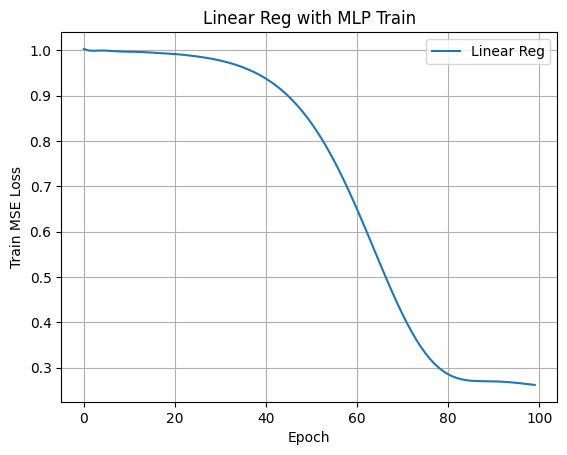

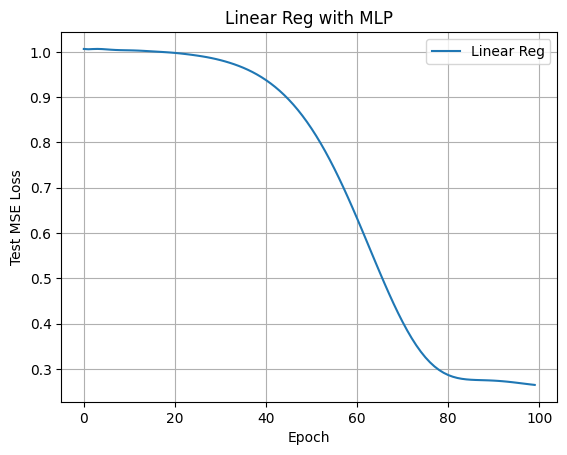

0.7390428781509399
Average R2 across outputs: 0.7390428781509399
Individual R2 scores: [0.93720454 0.5408813 ]


In [28]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score

print(params_train.shape)

model = nn.Sequential(
            nn.Linear(params_train.shape[1], 64),
            nn.Sigmoid(),
            nn.Linear(64, 64),
            nn.Sigmoid(),
            nn.Linear(64, 32),
            nn.Sigmoid(),
            nn.Linear(32, 2)
        )


mseLoss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_mse_losses = []
test_r2_scores = []
results_pred = []
epochs = 100
for epoch in range(epochs):
 model.train()
 optimizer.zero_grad()
 outputs = model(params_train)
 loss = mseLoss(outputs, results_train)
 loss.backward()
 optimizer.step()

 model.eval()
 with torch.no_grad():
     test_pred = model(params_test)
     test_mse_loss = mseLoss(test_pred, results_test)
     results_pred.append(test_pred)

 train_losses.append(loss.item())
 test_mse_losses.append(test_mse_loss.item())

 print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_mse_loss.item():.4f}')

torch.save(model, 'Sigmoid4Layers.pth')


plt.plot(train_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Train MSE Loss")
plt.title("Linear Reg with MLP Train")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(test_mse_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Test MSE Loss")
plt.title("Linear Reg with MLP")
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import r2_score

final_test_pred = results_pred[-1].numpy()
results_test_nump = results_test.numpy()

test_r2_scores = r2_score(results_test_nump, final_test_pred)
print(test_r2_scores)
r2_each = r2_score(results_test_nump, final_test_pred, multioutput='raw_values')
print("Average R2 across outputs:", test_r2_scores)
print("Individual R2 scores:", r2_each)

SGD + Sigmoid

torch.Size([19200, 39])
Epoch 1/100, Train Loss: 1.0054, Test Loss: 1.0117
Epoch 2/100, Train Loss: 1.0041, Test Loss: 1.0106
Epoch 3/100, Train Loss: 1.0031, Test Loss: 1.0097
Epoch 4/100, Train Loss: 1.0022, Test Loss: 1.0090
Epoch 5/100, Train Loss: 1.0015, Test Loss: 1.0084
Epoch 6/100, Train Loss: 1.0009, Test Loss: 1.0079
Epoch 7/100, Train Loss: 1.0005, Test Loss: 1.0074
Epoch 8/100, Train Loss: 1.0001, Test Loss: 1.0071
Epoch 9/100, Train Loss: 0.9997, Test Loss: 1.0068
Epoch 10/100, Train Loss: 0.9995, Test Loss: 1.0066
Epoch 11/100, Train Loss: 0.9993, Test Loss: 1.0064
Epoch 12/100, Train Loss: 0.9991, Test Loss: 1.0062
Epoch 13/100, Train Loss: 0.9989, Test Loss: 1.0061
Epoch 14/100, Train Loss: 0.9988, Test Loss: 1.0060
Epoch 15/100, Train Loss: 0.9987, Test Loss: 1.0059
Epoch 16/100, Train Loss: 0.9986, Test Loss: 1.0058
Epoch 17/100, Train Loss: 0.9986, Test Loss: 1.0057
Epoch 18/100, Train Loss: 0.9985, Test Loss: 1.0057
Epoch 19/100, Train Loss: 0.9985, Test Loss: 1.00

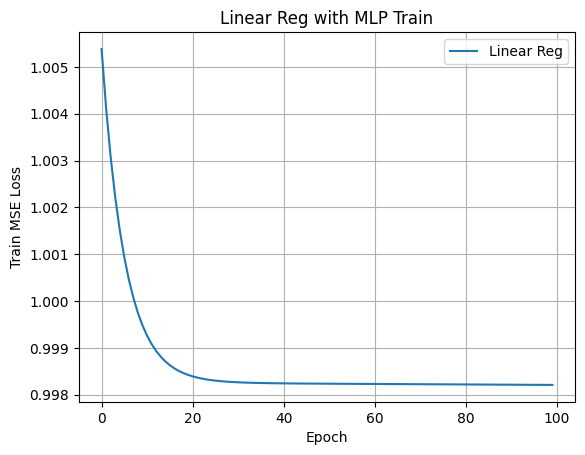

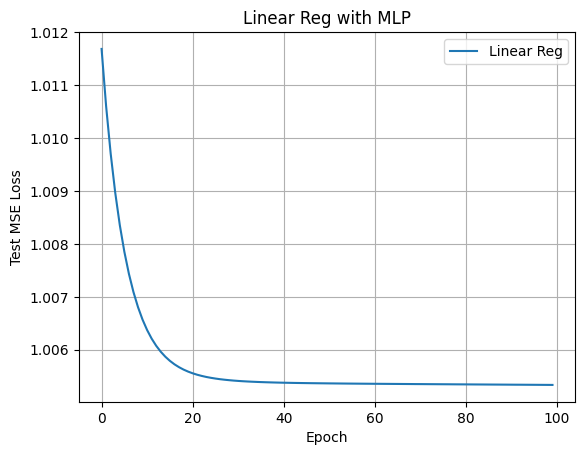

0.00031954050064086914
Average R2 across outputs: 0.00031954050064086914
Individual R2 scores: [ 6.608963e-04 -2.181530e-05]


In [27]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score

print(params_train.shape)

model = nn.Sequential(
            nn.Linear(params_train.shape[1], 64),
            nn.Sigmoid(),
            nn.Linear(64, 64),
            nn.Sigmoid(),
            nn.Linear(64, 32),
            nn.Sigmoid(),
            nn.Linear(32, 2)
        )


mseLoss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

train_losses = []
test_mse_losses = []
test_r2_scores = []
results_pred = []
epochs = 100
for epoch in range(epochs):
 model.train()
 optimizer.zero_grad()
 outputs = model(params_train)
 loss = mseLoss(outputs, results_train)
 loss.backward()
 optimizer.step()

 model.eval()
 with torch.no_grad():
     test_pred = model(params_test)
     test_mse_loss = mseLoss(test_pred, results_test)
     results_pred.append(test_pred)

 train_losses.append(loss.item())
 test_mse_losses.append(test_mse_loss.item())

 print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_mse_loss.item():.4f}')

torch.save(model, 'Sigmoid4LayersSGD.pth')


plt.plot(train_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Train MSE Loss")
plt.title("Linear Reg with MLP Train")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(test_mse_losses, label="Linear Reg", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Test MSE Loss")
plt.title("Linear Reg with MLP")
plt.legend()
plt.grid(True)
plt.show()


from sklearn.metrics import r2_score

final_test_pred = results_pred[-1].numpy()
results_test_nump = results_test.numpy()
test_r2_scores = r2_score(results_test_nump, final_test_pred)
print(test_r2_scores)
r2_each = r2_score(results_test_nump, final_test_pred, multioutput='raw_values')
print("Average R2 across outputs:", test_r2_scores)
print("Individual R2 scores:", r2_each)